In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

A) Load the dataset into a DataFrame, ensuring to extract column names
from the 'adult.names' file. Additionally, append 'income' as the column name
for the target variable. Print the first 5 rows of data.

In [43]:
data = pd.read_csv(r"C:\Users\ankur\Documents\Data mining\HW1\adult\adult.data")

#To extract column names from text file with our descriptions.
with open(r"C:\Users\ankur\Documents\Data mining\HW1\adult\adult.names") as file_handle:
    raw_data = file_handle.readlines()
    
key_columns = raw_data[96:110]

colsname=[]
for row in key_columns:
    key_columns = row.split(':') 
    colsname.append(key_columns[0].strip())
colsname.append("income")

data.columns = colsname
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


B) How many categorical variables do you see, and how many numerical
variables?. Is the target variable (“income”) a categorical variable or numerical?

Ans: I noticed, 9 Categorical variables and 6 Numerical variables excluding "income". "Income" is also an categorical variable as the dataset is categorised into people having incomes greater than and less than 50k.

C) Utilize a bar chart to highlight the distribution of age for individuals
earning above and below $50,000. Provide a brief summary of your
observations.

<BarContainer object of 32560 artists>

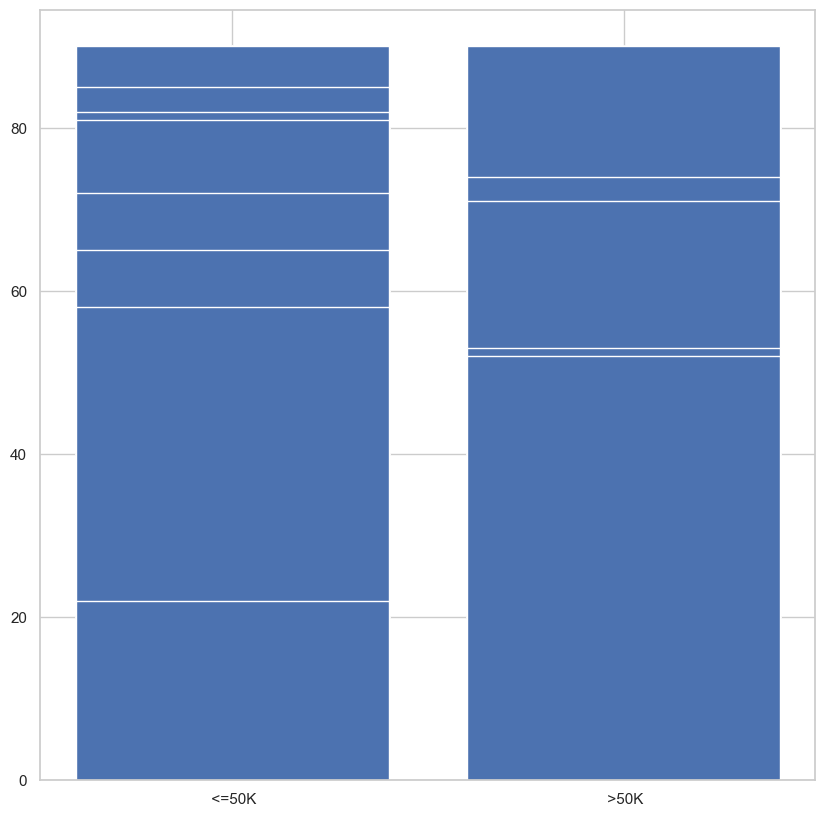

In [44]:
fig = plt.figure(figsize = (10, 10))
plt.bar(data['income'], data['age'])

In [46]:
print("""\nLooking at the bar chart for Age vs Income, we notice that there are people in every age group that earn both less than and greater than 50k.""")
max_less50k = data['age'].loc[data['income'] == ' <=50K'].value_counts().head(5)
max_greater50k = data['age'].loc[data['income'] == ' >50K'].value_counts().head(5)

print("""\nNow, when we check for the dominant age groups in both income categories we found that people above age 35 usually are earning more than 50k while people 30 are earning less than 50k. 
This statistics is also affected by other factors which we have not taken in considration during this plot.""")


Looking at the bar chart for Age vs Income, we notice that there are people in every age group that earn both less than and greater than 50k.

Now, when we check for the dominant age groups in both income categories we found that people above age 35 usually are earning more than 50k while people 30 are earning less than 50k. 
This statistics is also affected by other factors which we have not taken in considration during this plot.


D) Explore the relationship between hours worked per week and
income in the dataset, segmented by gender by plotting a side-by-side
boxplot. Report the median, interquartile range, and any outliers in the working
hours. What does this reveal about the differences in working hours by gender
across income categories?

In [6]:
newdata = data.groupby(['sex','income'])


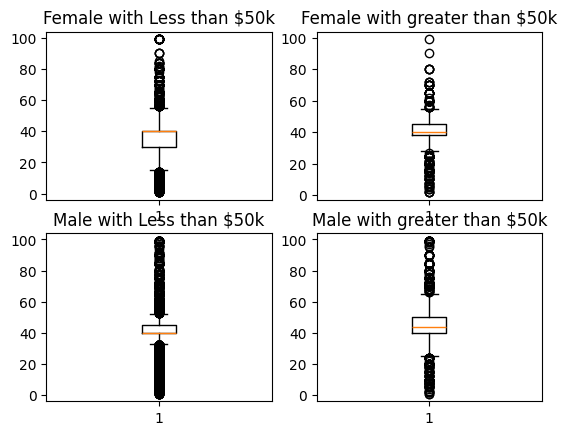

In [7]:
figure, axis = plt.subplots(2, 2) 
  

axis[0, 0].boxplot(newdata['hours-per-week'].get_group((' Female',' <=50K')))
axis[0, 0].set_title("Female with Less than $50k") 
  

axis[0, 1].boxplot(newdata['hours-per-week'].get_group((' Female',' >50K')))
axis[0, 1].set_title("Female with greater than $50k") 
  

axis[1, 0].boxplot(newdata['hours-per-week'].get_group((' Male',' <=50K')))
axis[1, 0].set_title("Male with Less than $50k") 
  

axis[1, 1].boxplot(newdata['hours-per-week'].get_group((' Male',' >50K'))) 
axis[1, 1].set_title("Male with greater than $50k") 
  
# Combine all and display 
plt.show() 


In [8]:
newdata['hours-per-week'].describe()

count       mean        std  min   25%   50%   75%   max
sex     income                                                            
 Female  <=50K   9592.0  35.916701  11.786303  1.0  30.0  40.0  40.0  99.0
         >50K    1179.0  40.426633  11.238290  2.0  38.0  40.0  45.0  99.0
 Male    <=50K  15127.0  40.693925  12.290774  1.0  40.0  40.0  45.0  99.0
         >50K    6662.0  46.366106  10.729019  1.0  40.0  44.0  50.0  99.0

In [9]:
print("""From the above data, we noticed that the mean hours of working per week is greater for Men irrespective of earning categories.""")

From the above data, we noticed that the mean hours of working per week is greater for Men irrespective of earning categories.


# Q2

In [10]:
clg_data = pd.read_csv(r"C:\Users\ankur\Documents\Data mining\HW1\Admission_Predict.csv")
clg_data.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,yes,0.92
1,2,324,107,4,4.0,4.5,8.87,yes,0.76
2,3,316,104,3,3.0,3.5,8.00,yes,0.72
3,4,322,110,3,3.5,2.5,8.67,yes,0.80
4,5,314,103,2,2.0,3.0,8.21,no,0.65


 A) Create a scatterplot of CGPA and GRE Score. Use color to indicate
research experience. Use a regression line to analyze the strength and direction
of this relationship. Interpret the plot in your own words.

In [11]:
encoded_research = np.array(clg_data['Research'])
encoded_research[encoded_research == 'yes'] = 1
encoded_research[encoded_research == 'no'] = 0


The correlation between the CGPA and GRE Score is 0.83 which indicates a strong positive relation between these variables.
Also the slope of the regression line is positive, which inturn indicate a positive relation.



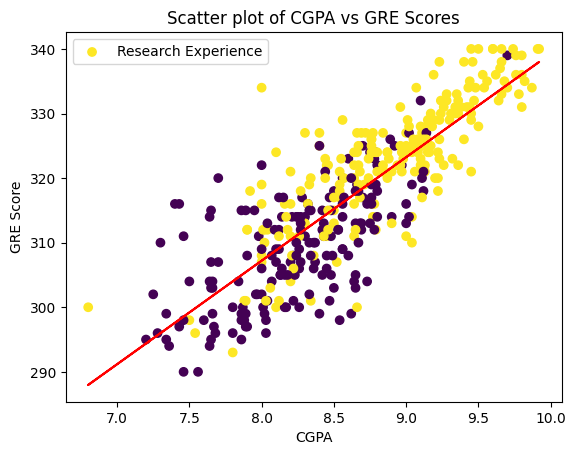

In [12]:
plt.scatter(clg_data['CGPA'], clg_data['GRE Score'], c=encoded_research)
plt.xlabel("CGPA")
plt.ylabel("GRE Score")
plt.legend(["Research Experience" , "No Research Experience"])
plt.title("Scatter plot of CGPA vs GRE Scores")

#adding regression line
m, b = np.polyfit(clg_data['CGPA'], clg_data['GRE Score'], 1)
plt.plot(clg_data['CGPA'], m*clg_data['CGPA']+b, color='red')

print("""\nThe correlation between the CGPA and GRE Score is """+ str(round(clg_data['CGPA'].corr(clg_data['GRE Score']),2))+""" which indicates a strong positive relation between these variables.
Also the slope of the regression line is positive, which inturn indicate a positive relation.\n""")


B) Create a scatterplot of University Rating vs Research. Why is the plot
not useful? Pick an appropriate chart type to reveal the relationship between
University Rating and Research.

Text(0.5, 1.0, 'Scatter plot of University Rating vs Research')

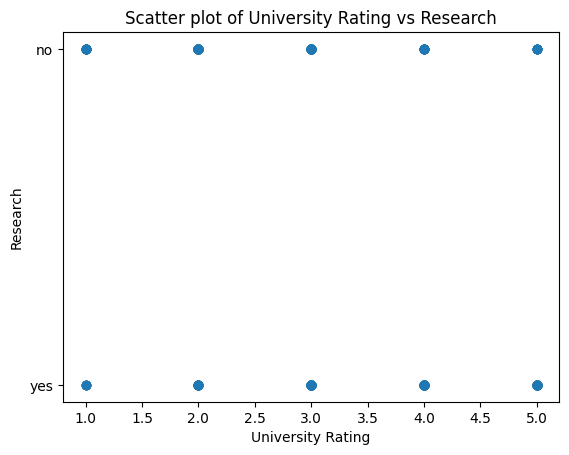

In [13]:
plt.scatter(clg_data['University Rating'], clg_data['Research'])
plt.xlabel("University Rating")
plt.ylabel("Research")
plt.title("Scatter plot of University Rating vs Research")

The above plot is not useful as we cannot see any kind of relationship between the University Rating and Research as a requirement. It just shows us that there are colleges at every rating that do and do not require Research. 'University Rating' and 'Research' are categorical variables due to which scatter plot is not best suited. Scatterplots are typically suitable for visualizing the relationship between two continuous variables. A more appropriate plot between University Rating and Research would be a line plot grouped by ratings.

Text(0.5, 1.0, 'Plot of University Rating vs Research(Not required)')

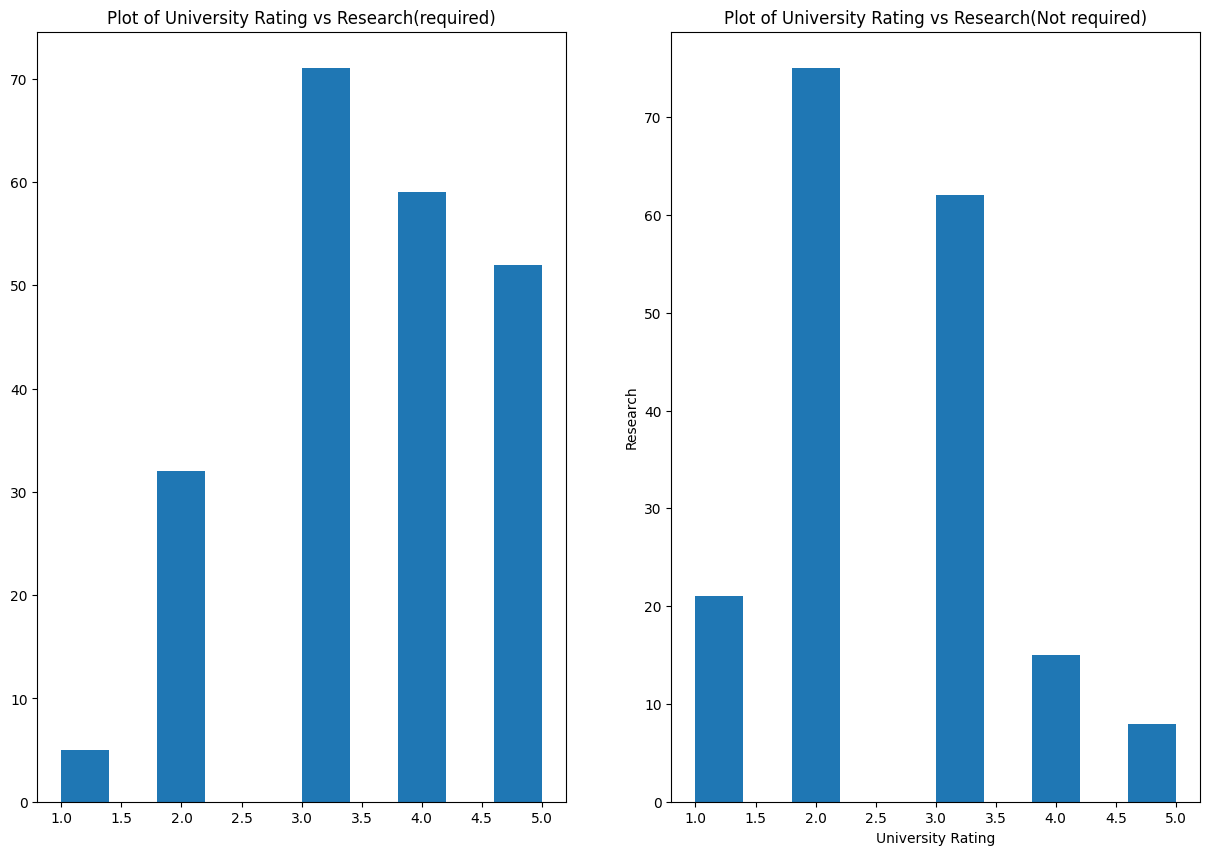

In [14]:
figure, axis = plt.subplots(1, 2, figsize=(15, 10)) 
new_clg_data = clg_data.groupby('Research')

axis[0].hist(new_clg_data['University Rating'].get_group('yes'))
plt.xlabel("University Rating")
plt.ylabel("Research")
axis[0].set_title("Plot of University Rating vs Research(required)")

axis[1].hist(new_clg_data['University Rating'].get_group('no'))
plt.xlabel("University Rating")
plt.ylabel("Research")
plt.title("Plot of University Rating vs Research(Not required)")

The above plot shows us that Universities that have Research as a requirement generally have a higher rating.

C) In this dataset, 'Chance of Admit' is the target variable, with values
spanning from 0.34 to 0.97. What visualization or statistical approach would
you employ to investigate this variable? Apply your selected method and
provide an analysis of the observed trends or patterns.


The variable chance of admit shows a probability that if you a student have the scores and requiements close to the mentioned details by the university then they might have a chance of getting an admit from this university. 
Usually, on this type of varibale we would to a validation test by comparing this to real world admit data. But as we do not have any real world data to comapre it to, we can split the data and then predict the Target variable and then use rest of the split to validate the prediction model.

In [15]:

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Convert 'Research' column to numerical values (1 for 'yes', 0 for 'no')
le = LabelEncoder()
clg_data['Research'] = le.fit_transform(clg_data['Research'])

# Select features (X) and target variable (y)
X = clg_data.drop('Chance of Admit ', axis=1)
y = clg_data['Chance of Admit ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.004616592264723959
R-squared: 0.8212241793299226


The above values of MSE and R^2 signifies that our simple linear regression model provides a low error between actual and predicted values along with a good fit for the target variable "Chance of admit".

# Q3

In [16]:
firedata = pd.read_csv(r"C:\Users\ankur\Documents\Data mining\HW1\forestfires.csv")
firedata.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


A) Plot a stacked bar chart to show the number of forest fires grouped by months
and days of the week. (Make sure the months are in chronological order i.e
attribute values are sorted starting with January and ending with December).
Interpret the plot. Do you see any issues with the stacked bar chart? How would
you rectify them? (6 points)

In [17]:
pivot = firedata.groupby(['month', 'day']).size().unstack()

M_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
pivot = pivot.reindex(M_order)

<Figure size 1200x600 with 0 Axes>

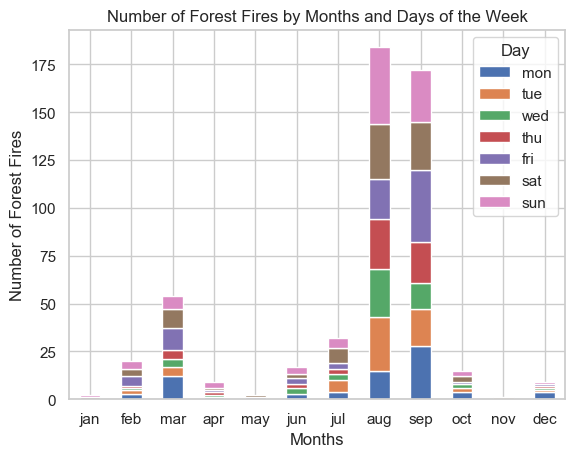

In [18]:
import seaborn as sns
custom_day_order = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

# Create a clustered bar chart with custom sorting order
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = pivot[custom_day_order].plot(kind='bar', stacked=True)

# Set plot labels and title
plt.xlabel('Months')
plt.ylabel('Number of Forest Fires')
plt.title('Number of Forest Fires by Months and Days of the Week')

# Add legend
plt.legend(title='Day', loc='upper right')
plt.xticks(rotation = 0)
# Show the plot
plt.show()

The stacked bar chart illustrates the frequency of forest fires across months and days of the week. Each bar's height indicates the total fires for a month, with segments representing specific days. Notably, August records the highest fires, followed by September, while November has the lowest. However, the legend lacks clarity on color-day associations. To enhance understanding, introducing gridlines, sorting the legend by days, and rotating x-axis labels to 0 degrees significantly improves chart readability. These adjustments facilitate a clearer connection between days of the week and their corresponding colors in the legend.

B) Create a scatter plot of the fires with the location(X & Y) as the X and Y axis, and
the size of the point indicating the area burnt. (3 points)

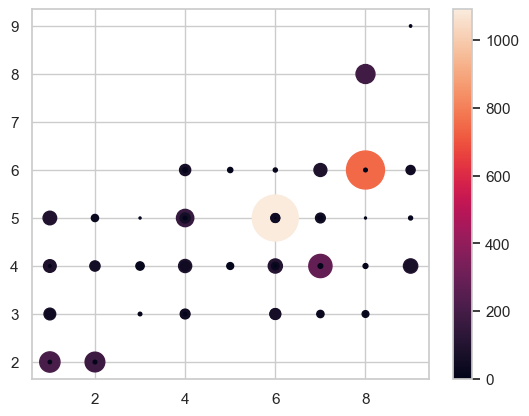

In [19]:
plt.scatter(firedata['X'], firedata['Y'], s=firedata['area'], c= firedata.area)
plt.colorbar()

C) Plot the scatter matrix for temp, RH, DC and DMC. How do you interpret the
result in terms of correlation among the variables?

In [20]:
new_firedata=firedata.drop(['month','day','X','Y','FFMC','ISI','wind','rain','area'], axis=1)
new_firedata.corr()

,DMC,DC,temp,RH
DMC,1.000000,0.682192,0.469594,0.073795
DC,0.682192,1.000000,0.496208,-0.039192
temp,0.469594,0.496208,1.000000,-0.527390
RH,0.073795,-0.039192,-0.527390,1.000000


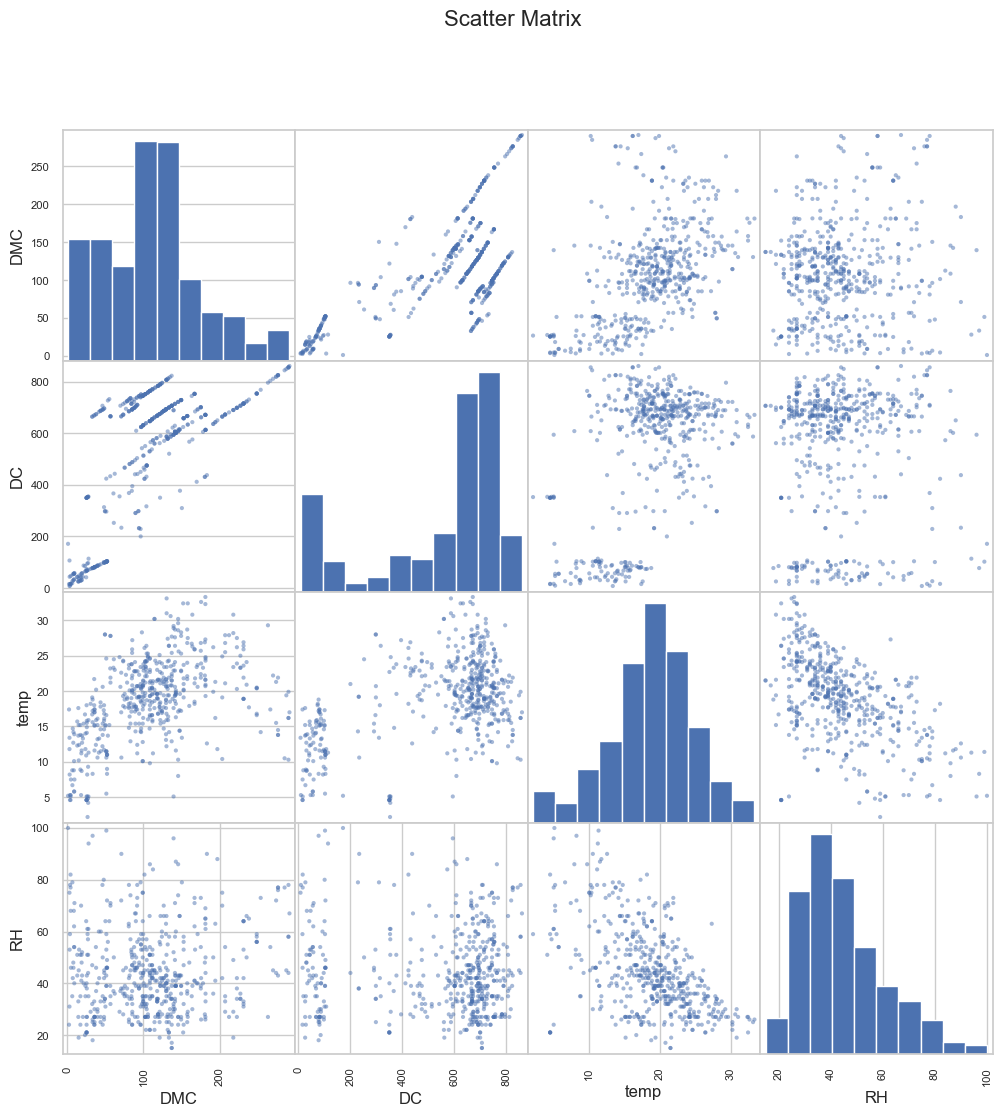

In [21]:

scatter_matrix = pd.plotting.scatter_matrix(new_firedata, figsize=(12, 12))
plt.suptitle('Scatter Matrix', size=16)
plt.show()


Let's interpret the correlation matrix:

DMC (Duff Moisture Code) and DMC:
Correlation: 1.000000
Interpretation: The correlation of a variable with itself is always 1. This is a perfect positive correlation, which is expected.

DMC and DC (Drought Code):
Correlation: 0.682192
Interpretation: There is a strong positive correlation (0.682192) between DMC and DC. This suggests that as one of these variables increases, the other tends to increase as well.

DMC and temp (Temperature):
Correlation: 0.469594
Interpretation: There is a moderate positive correlation (0.469594) between DMC and temperature. This implies that higher temperatures are associated with higher DMC values.

DMC and RH (Relative Humidity):
Correlation: 0.073795
Interpretation: There is a weak positive correlation (0.073795) between DMC and relative humidity. The correlation is not very strong, suggesting a limited relationship between DMC and relative humidity.

DC and temp:
Correlation: 0.496208
Interpretation: There is a moderate positive correlation (0.496208) between DC and temperature. As temperature increases, DC tends to increase as well.

DC and RH:
Correlation: -0.039192
Interpretation: There is a very weak negative correlation (-0.039192) between DC and relative humidity. The correlation is close to zero, indicating a minimal relationship between DC and relative humidity.

temp and RH:
Correlation: -0.527390
Interpretation: There is a strong negative correlation (-0.527390) between temperature and relative humidity. This suggests an inverse relationship, meaning as temperature increases, relative humidity tends to decrease, and vice versa.

D) Open-ended analysis question - perform your own exploratory data analysis on
this dataset, and present at least two findings. Feel free to use any of the
concepts covered in the textbook or in class or otherwise (8 points)

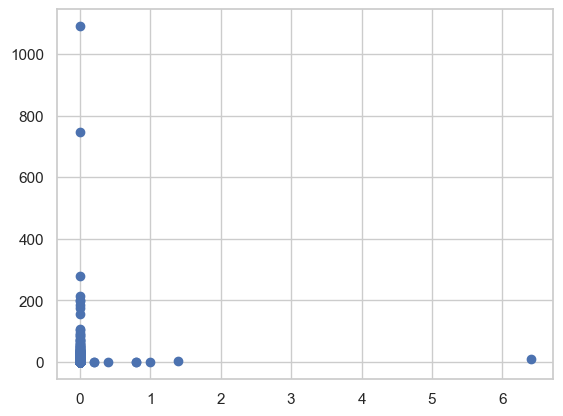

In [25]:
plt.scatter(firedata['rain'],firedata['area'])
print("""From the below scatter plot between rain vs area burned. We noticed that area with minimum rain faced most area burned.


The below plot is between Drought code(DC) and Relative Humidity(RH), sizes of the marker are according to the area burned. 
From this plot, we can see that the regions where Drought code is more but has lower RH faces more burned area and vice-versa. 
This analysis brought out exceptions which can be explained by high temprature, wind and DMC values.



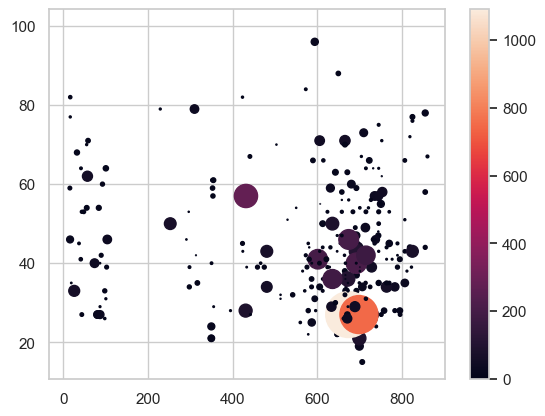

In [33]:
plt.scatter(firedata['DC'],firedata['RH'], s=firedata.area,c= firedata.area)
plt.colorbar()

print("""\nThe below plot is between Drought code(DC) and Relative Humidity(RH), sizes of the marker are according to the area burned. 
From this plot, we can see that the regions where Drought code is more but has lower RH faces more burned area and vice-versa. 
This analysis brought out exceptions which can be explained by high temprature, wind and DMC values.\n""")

# Extra Credit Questions

# Q1

In [35]:
#Q1.1

prob_pass_man = 70/100
prob_man = 60/100

prob_pass_woman = 80/100
prob_woman = 40/100

prob_passed = (prob_pass_man * prob_man) + (prob_pass_woman * prob_woman)

print(f"Probability of randomly chosen student passed the exam is: {prob_passed:.2f} or {prob_passed * 100:.0f}%")

Probability of randomly chosen student passed the exam is: 0.74 or 74%


In [36]:
#Q1.2

prob_pass_woman = 80/100
prob_woman = 40/100

prob_woman_pass = (prob_pass_woman * prob_woman) / prob_passed

print(f"Probability of student is a woman is: {prob_woman_pass:.2f} or {prob_woman_pass * 100:.0f}%")

Probability of student is a woman is: 0.43 or 43%


In [37]:
#Q1.3

prob_failed = 1 - prob_passed

prob_man_fail = ((1 - prob_pass_man) * prob_man) / prob_failed

print(f"Probability that a student is a man: {prob_man_fail:.2f} or {prob_man_fail * 100:.0f}%")

Probability that a student is a man: 0.69 or 69%


# Q2

In [38]:
#Q 2.1
import scipy.stats as stats

mean_height = 145
std_deviation = 22
lower_limit = 135
upper_limit = 155

z_lower = (lower_limit - mean_height) / std_deviation
z_upper = (upper_limit - mean_height) / std_deviation

percentage_between = stats.norm.cdf(z_upper) - stats.norm.cdf(z_lower)

print(f"The percentage of plants between 135cm and 155cm tall is: {percentage_between * 100:.2f}%")

The percentage of plants between 135cm and 155cm tall is: 35.06%


In [39]:
#Q 2.2

sample_size = 16

sdsm = std_deviation / (sample_size**0.5)

z_lower = (lower_limit - mean_height) / sdsm
z_upper = (upper_limit - mean_height) / sdsm

probability_between = stats.norm.cdf(z_upper) - stats.norm.cdf(z_lower)

print(f"Probability that the mean height of a random sample of 16 plants is between 135cm and 155cm is: {probability_between * 100:.2f}%")


Probability that the mean height of a random sample of 16 plants is between 135cm and 155cm is: 93.10%


In [40]:
# Q2.3

from scipy.stats import norm

sample_size = 32

sdsm = std_deviation / (sample_size ** 0.5)

z_lower = (lower_limit - mean_height) / sdsm
z_upper = (upper_limit - mean_height) / sdsm

probability_between = norm.cdf(z_upper) - norm.cdf(z_lower)

print(f"Probability that the mean height of a random sample of 32 plants is : {probability_between * 100:.2f}%")

Probability that the mean height of a random sample of 32 plants is : 98.99%


# Q3

Ans: From the given data, we can observe that people who use left hand does not dominantly have any preference for the foot. Whereas people who use right hand have dominantly reported to use right foot. This is due the functionality diffrence between hands and foots. So, from the given data, we cannot say that hand and foot preference are dependent Or we can say that they are independent.

# Q4 
Differentiate between noise and outliers in data. Answer the following
 questions with 'Yes' or 'No,' and provide explanations for your responses:


Ans: An “outlier” is a data point or value that differs considerably from all or most other data in a dataset. An outlier won’t make your model fail. Just the answer to be faulty(..most/some of the times based on a number of records and the number of outliers.). An outlier is not a false value or void in meaning. It is definite and accurate but when it is linked with the other tuples in your model, it is just not in the same range. 



Noise  is any undesirable or unwanted signal or part of a signal. Noise may or may not be random
Noise will almost certainly fail your model. 9 times out of 10. Noise is garbage. Void, Null information that is not useful at all, under any circumstances.

Take an example of a basket of white eggs. Now, if the basket has a brown egg then this would be an outlier since, you were not looking for it but brown or white, it is still a egg i.e. relevant to the dataset. Now, if the basket of eggs has an orange then that would be noise, since, you were not looking for any kind of orange in the dataset of eggs..

(a) Is noise ever interesting or desirable? What about outliers?
Ans: No, Noise data is never intresting. On the other hand, Outliers are also not desirable, since, outliers add unwanted calculations but our model will work even if the outliers are present. But with Noise, the model will fail most probably.

(b) Can noise objects also be outliers?
Ans: No, Noise objects are not considered outliers as they are not even considered a valid part of the desirable data.

(c) Are noise objects always considered outliers?
Ans: No, Noise are not considered as Outliers but Yes we can give them the same treatment as outliers i.e. get rid of them.

(d) Are outliers always considered noise objects?
Ans: No, Outliers are not considered as Noise as the Outliers are still valid data points.

(e) Can noise transform a typical value into an unusual one, or the other way around?
Ans: Noise will not transform the typical value into an unusual one but Noise will prevent our model to even proceed wiht the calculations. Consider our egg basket example from above, if our model is expecting a eggas an input then an orange will not be processed by the model.